In [1]:
import pandas as pd

from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

import matplotlib.pyplot as plt


In [2]:
#set up chrome options for selenium web driver
chrome_options = Options()
chrome_options.add_argument('--no-sandbox')

#create service
webdriver_service =Service(ChromeDriverManager().install())



[WDM] - Downloading: 100%|██████████| 6.80M/6.80M [00:01<00:00, 4.31MB/s]


In [8]:
#create driver
driver = webdriver.Chrome(service = webdriver_service, options=chrome_options)

In [10]:
#go to url with characters
page_url = 'https://www.hp-lexicon.org/character/?letter=A'
driver.get(page_url)

In [41]:
#get list of pages and their links
pagination=driver.find_element(By.XPATH, "//ul[@class='pagination']")
page_elements = pagination.find_elements(By.TAG_NAME,'a')

pages = []
for page in page_elements:
    page_url = page.get_attribute('href')
    page_name = page.text
    pages.append({'page_name': page_name, 'url':page_url})

pages



[{'page_name': 'A', 'url': 'https://www.hp-lexicon.org/character/?letter=A'},
 {'page_name': 'B', 'url': 'https://www.hp-lexicon.org/character/?letter=B'},
 {'page_name': 'C', 'url': 'https://www.hp-lexicon.org/character/?letter=C'},
 {'page_name': 'D', 'url': 'https://www.hp-lexicon.org/character/?letter=D'},
 {'page_name': 'E', 'url': 'https://www.hp-lexicon.org/character/?letter=E'},
 {'page_name': 'F', 'url': 'https://www.hp-lexicon.org/character/?letter=F'},
 {'page_name': 'G', 'url': 'https://www.hp-lexicon.org/character/?letter=G'},
 {'page_name': 'H', 'url': 'https://www.hp-lexicon.org/character/?letter=H'},
 {'page_name': 'I', 'url': 'https://www.hp-lexicon.org/character/?letter=I'},
 {'page_name': 'J', 'url': 'https://www.hp-lexicon.org/character/?letter=J'},
 {'page_name': 'K', 'url': 'https://www.hp-lexicon.org/character/?letter=K'},
 {'page_name': 'L', 'url': 'https://www.hp-lexicon.org/character/?letter=L'},
 {'page_name': 'M', 'url': 'https://www.hp-lexicon.org/character

In [42]:
character_list=[]

#for each page in the pagination
for page in pages:
    #go to the page url
    driver.get(page['url'])
    #get the elements with the names of the characters
    character_elements = driver.find_elements(By.XPATH, '//span[@itemprop="headline"]')
    #for each character, add their name and the page they were found to the list
    for character in character_elements:
        letter = page['page_name']
        character = character.text
        character_list.append({'letter': letter, 'character':character})

character_list

[{'letter': 'A', 'character': 'Mrs. Abbott'},
 {'letter': 'A', 'character': 'Abbott family'},
 {'letter': 'A', 'character': 'Hannah Abbott'},
 {'letter': 'A', 'character': 'Abel Treetops'},
 {'letter': 'A', 'character': 'Euan Abercrombie'},
 {'letter': 'A', 'character': 'Aberforth Dumbledore'},
 {'letter': 'A', 'character': 'Abernathy'},
 {'letter': 'A', 'character': 'Abraham Peasegood'},
 {'letter': 'A', 'character': 'Abraham Potter'},
 {'letter': 'A', 'character': 'Abraxas Malfoy'},
 {'letter': 'A', 'character': 'Achilles Tolliver'},
 {'letter': 'A', 'character': 'Stewart Ackerley'},
 {'letter': 'A', 'character': 'Adalbert Waffling'},
 {'letter': 'A', 'character': 'Adrian Pucey'},
 {'letter': 'A', 'character': 'Adrian Tutley'},
 {'letter': 'A', 'character': 'three African wizards'},
 {'letter': 'A', 'character': 'Agatha Chubb'},
 {'letter': 'A', 'character': 'Agatha Timms'},
 {'letter': 'A', 'character': 'Agilbert Fontaine'},
 {'letter': 'A', 'character': 'Agnes'},
 {'letter': 'A', '

In [43]:
df=pd.DataFrame(character_list)
df.head()

,letter,character
0,A,Mrs. Abbott
1,A,Abbott family
2,A,Hannah Abbott
3,A,Abel Treetops
4,A,Euan Abercrombie


In [44]:
path=r'C:\Users\Sherrif\Desktop\Everything\Projects\Code\Network analysis\harry_potter_network\data\interim\ '
df.to_csv(path +'characters.csv')

### What is the most common starting letter of the names in harry potter

<Axes: xlabel='letter'>

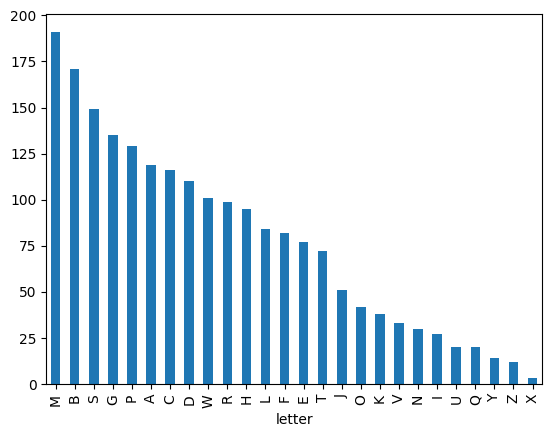

In [45]:
df['letter'].value_counts().plot(kind='bar')

1. M is the most common starting letter for a name 
2. X is the least common starting letter for a name in harry potter
3. Surprisingly p is 5th considering the size of the potter family

### How many characters are in the harry potter universe

In [46]:
df.isnull().sum()

letter       0
character    0
dtype: int64

In [4]:
path = r'C:\Users\Sherrif\Desktop\Everything\Projects\Code\Network analysis\harry_potter_network\data\interim\ characters.csv'
df = pd.read_csv(path)
df.shape

(2020, 3)

There are about 2020 characters in the harry potter books

### How many families are in the harry potter universe

In [88]:
families_df = df[df['character'].str.contains('family')]
families_df.value_counts()

letter  character             
A       Abbott family             1
P       Prewett family            1
        Peverell family           1
        Parkinson family          1
        Parkin family             1
                                 ..
F       Flint family              1
        Finnigan family           1
        Finch-Fletchley family    1
        Fawley family             1
Y       Yaxley family             1
Name: count, Length: 74, dtype: int64

In [91]:
families_df.rename(columns={'character':'family'}, inplace=True)
families_df.head()

C:\Users\Sherrif\AppData\Local\Temp\ipykernel_5304\1710300175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  families_df.rename(columns={'character':'family'}, inplace=True)


,letter,family
1,A,Abbott family
118,A,Avery family
123,B,Bagman family
201,B,Black family
227,B,Bobbin family


There are 74 families in the harry potter universe

In [92]:
families_df[['surname','del']] = families_df['family'].str.split(' ', expand=True)
families_df



C:\Users\Sherrif\AppData\Local\Temp\ipykernel_5304\999066227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  families_df[['surname','del']] = families_df['family'].str.split(' ', expand=True)
C:\Users\Sherrif\AppData\Local\Temp\ipykernel_5304\999066227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  families_df[['surname','del']] = families_df['family'].str.split(' ', expand=True)


,letter,family,surname,del
1,A,Abbott family,Abbott,family
118,A,Avery family,Avery,family
123,B,Bagman family,Bagman,family
201,B,Black family,Black,family
227,B,Bobbin family,Bobbin,family
...,...,...,...,...
1842,U,Umbridge family,Umbridge,family
1889,V,Vulchanov family,Vulchanov,family
1915,W,Weasley family,Weasley,family
1981,W,Wood family,Wood,family


In [93]:
families_df.drop(['letter','del'], axis=1, inplace=True)
families_df

C:\Users\Sherrif\AppData\Local\Temp\ipykernel_5304\1811822688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  families_df.drop(['letter','del'], axis=1, inplace=True)


,family,surname
1,Abbott family,Abbott
118,Avery family,Avery
123,Bagman family,Bagman
201,Black family,Black
227,Bobbin family,Bobbin
...,...,...
1842,Umbridge family,Umbridge
1889,Vulchanov family,Vulchanov
1915,Weasley family,Weasley
1981,Wood family,Wood


In [94]:
families_df.to_csv(path+'families.csv')